In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# a) Faça o download dos dados do arquivo data.mat ou data.csv. A primeira
# coluna é o tamanho da casa, a segunda coluna é o número de quartos, e a
# terceira coluna é o preço da casa.

arquivo = "data.csv"
df = pd.read_csv(arquivo, names=["Tamanho", "Quartos", "Preço"])

In [ ]:
# b) Utilize o comando python .describe()para fazer uma primeira análise
# estatística da sua base de dados. Qual a média de preço das casas? Quanto
# custa a menor casa? Quantos quartos tem a casa mais cara?

descricao = df.describe()
print(descricao)
print(f"Média de preço: {df['Preço'].mean():.2f}")
print(f"Preço da menor casa: {df.loc[df['Tamanho'].idxmin(), 'Preço']}")
print(f"Quartos da casa mais cara: {df.loc[df['Preço'].idxmax(), 'Quartos']}")

           Tamanho    Quartos          Preco
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.765957
std     794.702354   0.760982  125039.911223
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000
Média de preço das casas: 340412.7659574468
Preço da menor casa: 179900.0
A casa mais cara tem 5 quartos.


In [ ]:
# c) Gere uma matriz X para as variáveis ​​independentes (que são o tamanho da
# casa e o número de quartos) e o vetor y da variável dependente (que é o
# preço).

X = data[["Tamanho", "Quartos"]].values
y = data["Preco"].values

Correlação entre as variáveis:
           Tamanho   Quartos     Preco
Tamanho  1.000000  0.559967  0.854988
Quartos  0.559967  1.000000  0.442262
Preco    0.854988  0.442262  1.000000


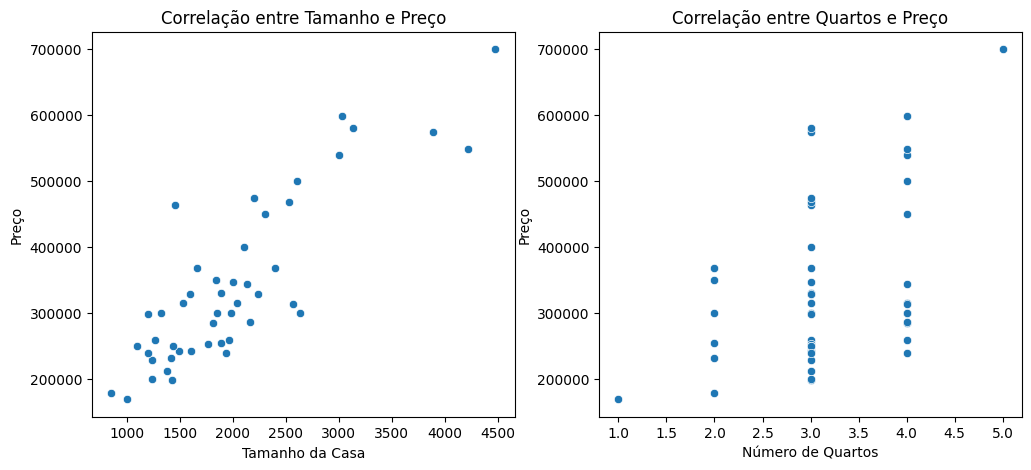

In [ ]:
# d) Correlação e gráfico de dispersão
correlacoes = data.corr()
print("Correlação entre as variáveis:\n", correlacoes)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['Tamanho'], y=data['Preco'])
plt.xlabel('Tamanho da Casa')
plt.ylabel('Preço')
plt.title('Correlação entre Tamanho e Preço')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data['Quartos'], y=data['Preco'])
plt.xlabel('Número de Quartos')
plt.ylabel('Preço')
plt.title('Correlação entre Quartos e Preço')
plt.show()

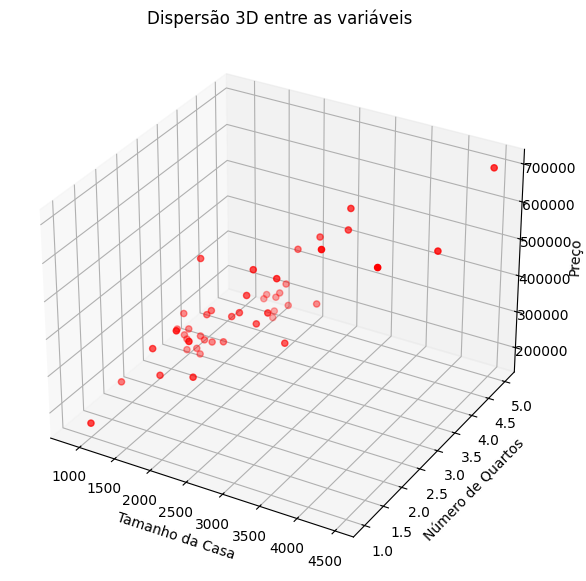

In [ ]:
# e) Calcule a Regressão Múltipla. Faça o gráfico de dispersão em 3D com o tamanho da casa, número de quartos, e o preço da casa.
# Neste caso iremos trabalhar com o espaço 3D (verifique como usar Axes3D).

modelo = LinearRegression()
modelo.fit(X, y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Tamanho'], data['Quartos'], data['Preco'], c='r', marker='o')
ax.set_xlabel('Tamanho da Casa')
ax.set_ylabel('Número de Quartos')
ax.set_zlabel('Preço')
plt.title('Dispersão 3D entre as variáveis')
plt.show()

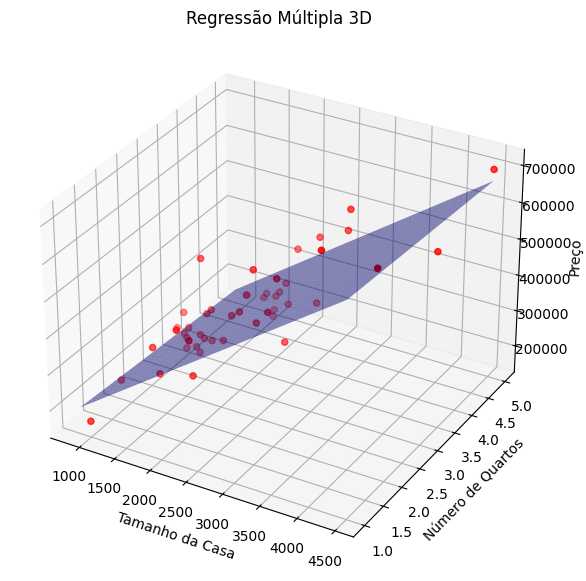

In [ ]:
# f) Trace a linha da regressão no Gráfico de Dispersão. Você pode girar este gráfico para visualizar melhor os dados.

xx, yy = np.meshgrid(np.linspace(data['Tamanho'].min(), data['Tamanho'].max(), 100),
                     np.linspace(data['Quartos'].min(), data['Quartos'].max(), 100))
zz = modelo.intercept_ + modelo.coef_[0] * xx + modelo.coef_[1] * yy

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Tamanho'], data['Quartos'], data['Preco'], c='r', marker='o')
ax.plot_surface(xx, yy, zz, color='blue', alpha=0.5)
ax.set_xlabel('Tamanho da Casa')
ax.set_ylabel('Número de Quartos')
ax.set_zlabel('Preço')
plt.title('Regressão Múltipla 3D')
plt.show()

          Tamanho   Quartos     Preco
Tamanho  1.000000  0.559967  0.854988
Quartos  0.559967  1.000000  0.442262
Preco    0.854988  0.442262  1.000000


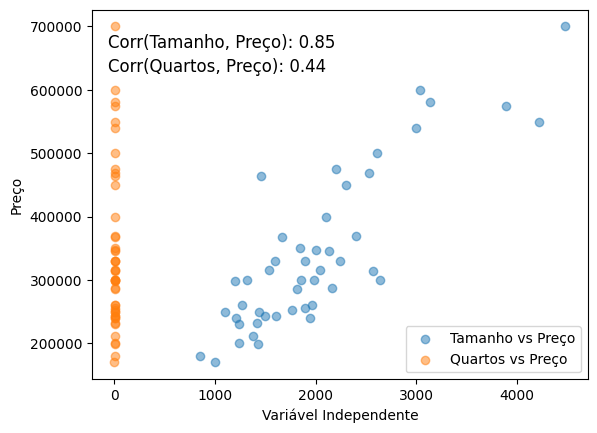

In [ ]:
# g) Mostre na figura os coeficientes de correlação entre Tamanho da casa e Preço e Número de quartos e Preço.

correlacoes = df[['Tamanho', 'Quartos', 'Preco']].corr()
print(correlacoes)

# Criar um gráfico de dispersão
plt.scatter(df['Tamanho'], df['Preco'], label="Tamanho vs Preço", alpha=0.5)
plt.scatter(df['Quartos'], df['Preco'], label="Quartos vs Preço", alpha=0.5)

# Adicionar coeficientes de correlação no gráfico
plt.figtext(0.15, 0.8, f"Corr(Tamanho, Preço): {correlacoes.loc['Tamanho', 'Preco']:.2f}", fontsize=12)
plt.figtext(0.15, 0.75, f"Corr(Quartos, Preço): {correlacoes.loc['Quartos', 'Preco']:.2f}", fontsize=12)

plt.xlabel("Variável Independente")
plt.ylabel("Preço")
plt.legend()
plt.show()

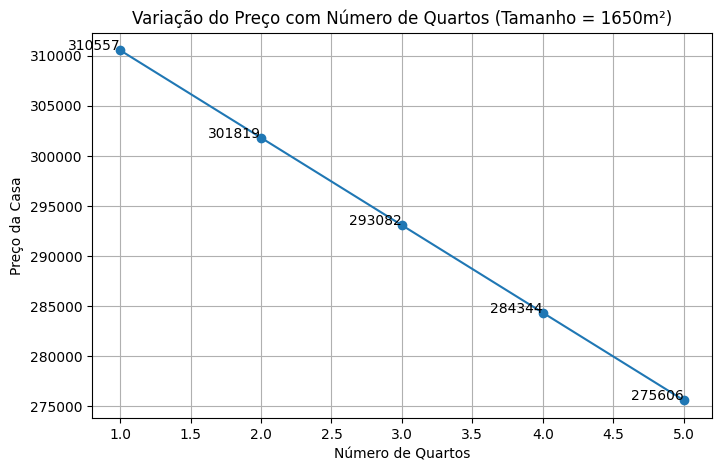

In [ ]:
# h) Calcule o preço de uma casa que tem tamanho de 1650 e 3 quartos. O resultado deve ser igual a 293081.
# Aumente e diminua a quantidade de número de quartos. O que acontece? Por qual motivo?

tamanho_fixo = 1650
quartos_variaveis = np.arange(1, 6)  # De 1 a 5 quartos

precos_previstos = [modelo.predict([[tamanho_fixo, q]])[0] for q in quartos_variaveis]

plt.figure(figsize=(8, 5))
plt.plot(quartos_variaveis, precos_previstos, marker='o', linestyle='-')
plt.xlabel("Número de Quartos")
plt.ylabel("Preço da Casa")
plt.title("Variação do Preço com Número de Quartos (Tamanho = 1650m²)")
plt.grid(True)

# Mostrar valores dos preços no gráfico
for i, preco in enumerate(precos_previstos):
    plt.text(quartos_variaveis[i], preco, f"{preco:.0f}", ha="right")

plt.show()

Intercepto (b0): 89597.76596099924
Coeficientes (b1, b2): [  139.21063465 -8737.91542019]
Erro Quadrático Médio (MSE): 4086560954.7851405
Coeficiente de Determinação (R²): 0.7329450119546197


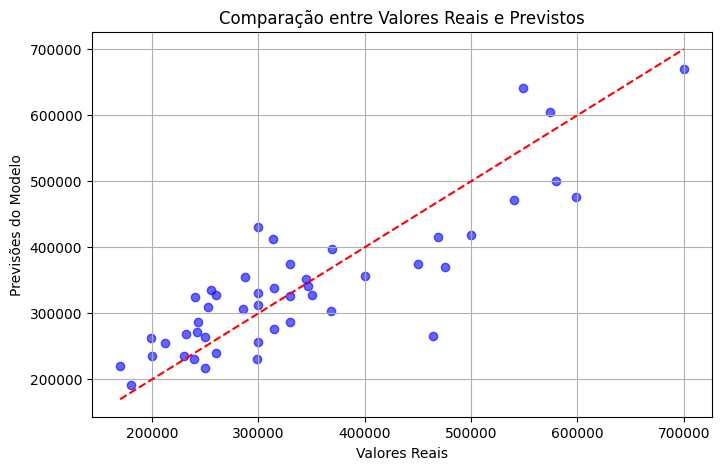

In [ ]:
# i) Comparação com a função de regressão múltipla do scikit-learn

# Criar modelo de regressão múltipla e treinar com os dados
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X, y)

# Fazer previsões
y_pred = modelo_sklearn.predict(X)

# Calcular erro quadrático médio
mse = mean_squared_error(y, y_pred)

# Calcular coeficiente de determinação R² (o quão bem o modelo se ajusta aos dados)
r2 = r2_score(y, y_pred)

# Exibir os resultados
print(f"Intercepto (b0): {modelo_sklearn.intercept_}")
print(f"Coeficientes (b1, b2): {modelo_sklearn.coef_}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

# Visualizar as previsões vs. valores reais
plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.6, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--r")  # Linha de referência ideal (perfeita previsão)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões do Modelo")
plt.title("Comparação entre Valores Reais e Previstos")
plt.grid()
plt.show()
